# Tutorial: Image Restoration 

In [1]:
from skimage import color

import matplotlib.pyplot as plt
import numpy  as np 
import scipy.ndimage as nd

# 1. Introduction: Discrete Measurement Model


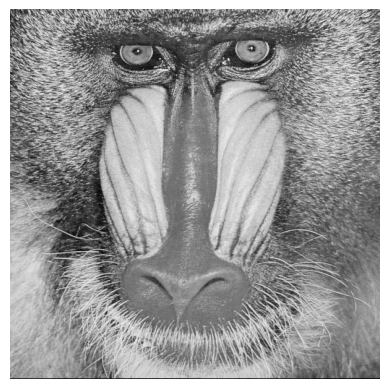

In [2]:
# read the image 
img_path = "images/baboon.png"
img = plt.imread(img_path)

# apply min-max normalization 
img = color.rgb2gray(img)
img = (img - img.min()) / (img.max() - img.min())

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## 1.1. Point Spread Function (PSF)

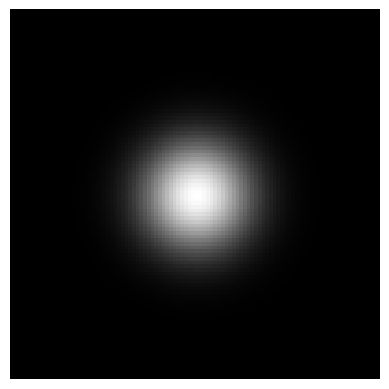

In [3]:
# Gaussian filter in spatial domain 
def gaussian_kernel(N, sigma):
    gaussian = lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))

    x = (1/N) * np.linspace(-N//2, N//2, N, endpoint=False)  
    y = (1/N) * np.linspace(-N//2, N//2, N, endpoint=False)  
    xx, yy = np.meshgrid(x, y, indexing='ij')
    
    gaussian_kernel = (1/N**2) * gaussian(xx, yy)
    return gaussian_kernel

kernel = gaussian_kernel(N=100, sigma=0.1)

plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.show()

## 1.2. Linear Shift Invariant (LSI) Systems and Convolution

In [4]:
# Impulse function 
imgs = np.zeros(shape=(3,size,size))
imgs[0][49:51, 49:51] = 1 

# Shift-invariance 
imgs[1][24:26, 24:26] = 1 

# Linearity 
coeff = [2, 5]
imgs[2] = coeff[0] * imgs[0] + coeff[1] * imgs[1]

# Convolution with Gaussian kernel 
imgs_conv = [nd.convolve(img, kernel) for img in imgs]

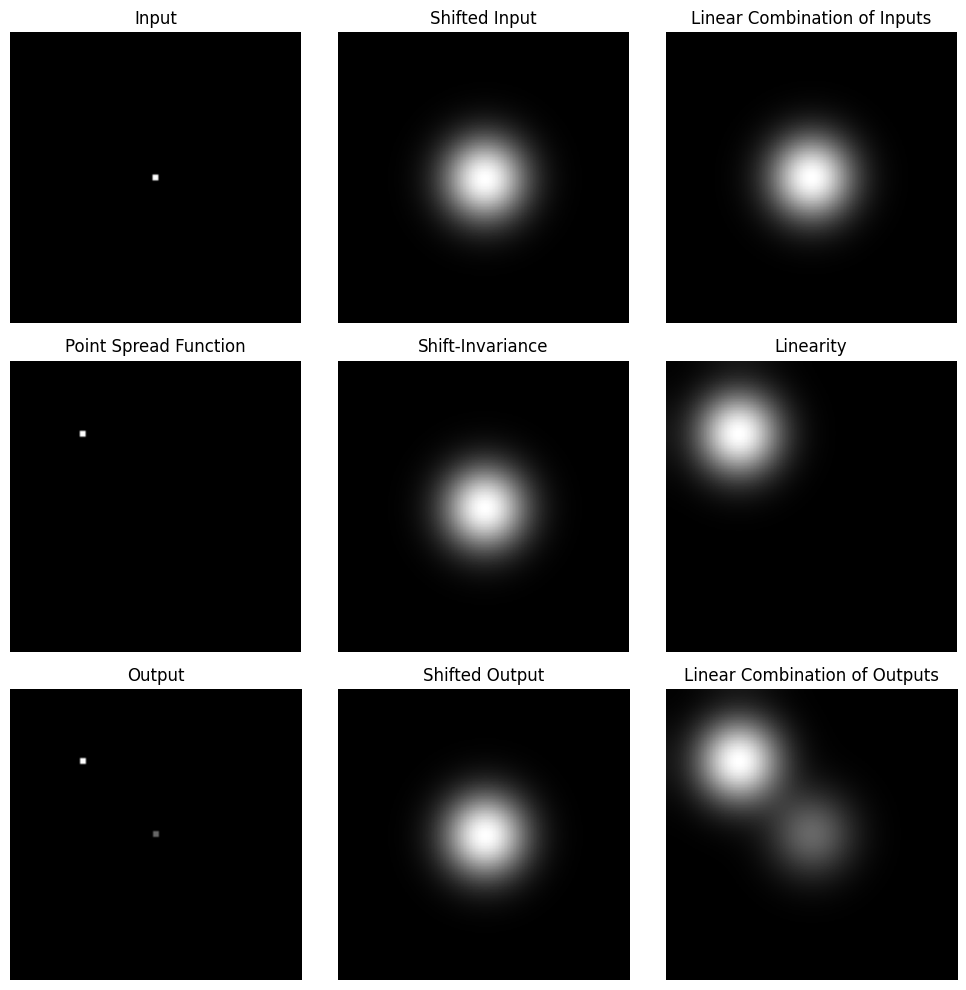

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

labels = [['Input', 'Shifted Input', 'Linear Combination of Inputs'],
            ['Point Spread Function', 'Shift-Invariance', 'Linearity'],
            ['Output', 'Shifted Output', 'Linear Combination of Outputs']]

for i in range(3):
    for j, data in enumerate([imgs[i], kernel, imgs_conv[i]]):
        axes[i, j].imshow(data, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(labels[j][i])

plt.tight_layout()
plt.show()

## 1.3. Convolution Theorem
## Example #1: High Pass Filter 

In [6]:
# Laplacian kernel 
kernel = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]])

# Fourier transform of the image
img_ft = np.fft.fft2(img)
img_ft = np.fft.fftshift(img_ft)

# Zero-padded kernel
# Fourier transform of the kernel has the same size as the input image
h, w = img.shape
kh, kw = kernel.shape 
kernel_pad = np.zeros_like(img, dtype="float64")
kernel_pad[h//2-kh//2:h//2+kh//2+1, w//2-kw//2:w//2+kw//2+1] = kernel

# Fourier transform of the kernel
kernel_ft = np.fft.fft2(kernel_pad)
kernel_ft = np.fft.fftshift(kernel_ft)

# Filter the image in Fourier domain 
img_filtered_ft = kernel_ft * img_ft
img_filtered = np.fft.ifft2(np.fft.fftshift(img_filtered_ft))
img_filtered = np.fft.fftshift(img_filtered).real 

In [7]:
# Filter the image in spatial domain 
img_conv = nd.convolve(img, kernel)
# assert np.allclose(img_conv, img_filtered)

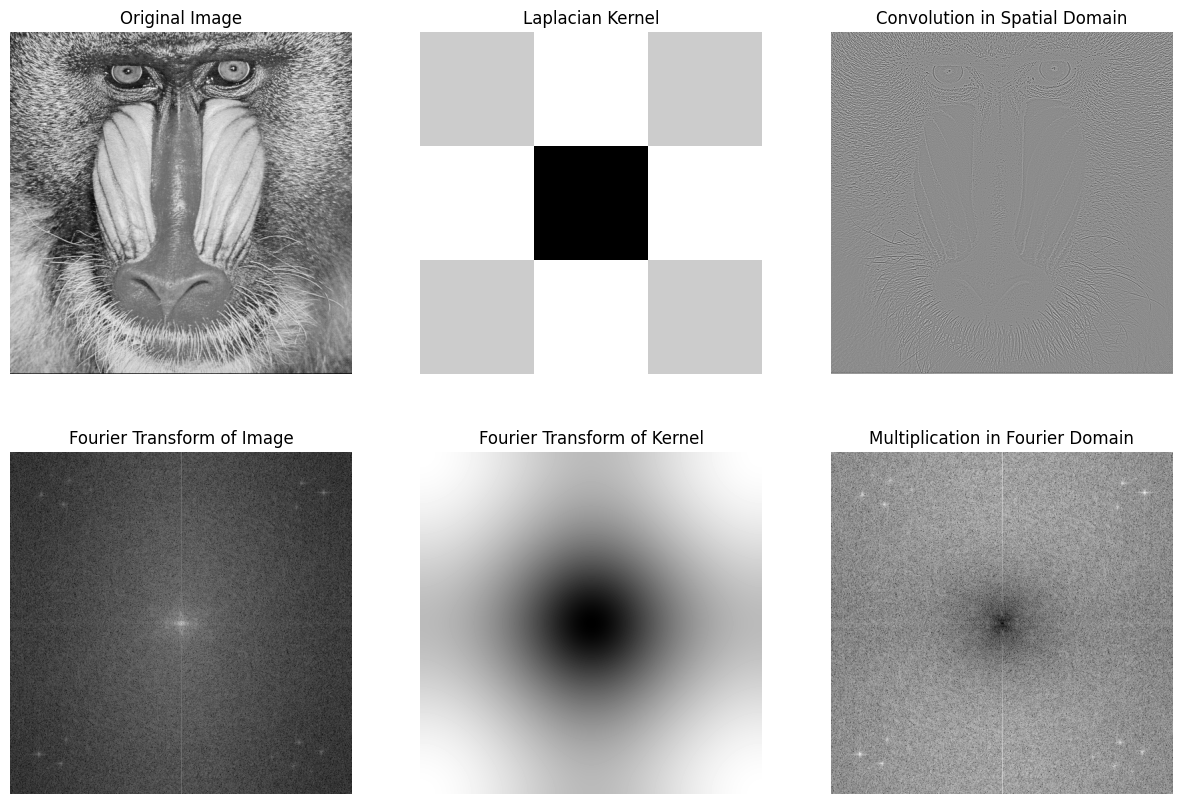

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(kernel, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Laplacian Kernel')

axes[0, 2].imshow(img_conv.real, cmap='gray')
axes[0, 2].axis('off')
axes[0, 2].set_title('Convolution in Spatial Domain')

axes[1, 0].imshow(np.log(1 + np.abs(img_ft)), cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Fourier Transform of Image')

axes[1, 1].imshow(np.log(1 + np.abs(kernel_ft)), cmap='gray')
axes[1, 1].axis('off')
axes[1, 1].set_title('Fourier Transform of Kernel')

axes[1, 2].imshow(np.log(1 + np.abs(img_ft * kernel_ft)), cmap='gray')
axes[1, 2].axis('off')
axes[1, 2].set_title('Multiplication in Fourier Domain')

plt.show()

## 1.3. Convolution Theorem
## Example #2: Low Pass Filter 

In [10]:
# Gaussian filter in the spatial domain
kernel = gaussian_kernel(N=img.shape[0], sigma=0.01)

# Gaussian filter in the frequency domain
kernel_ft = np.fft.fft2(kernel)
kernel_ft = np.fft.fftshift(kernel_ft)

# Image in the frequency domain
img_ft = np.fft.fft2(img)
img_ft = np.fft.fftshift(img_ft)

# Filter the image in frequency domain 
img_filtered_ft = kernel_ft * img_ft
img_filtered = np.fft.ifft2(np.fft.fftshift(img_filtered_ft))
img_filtered = np.fft.fftshift(img_filtered).real 

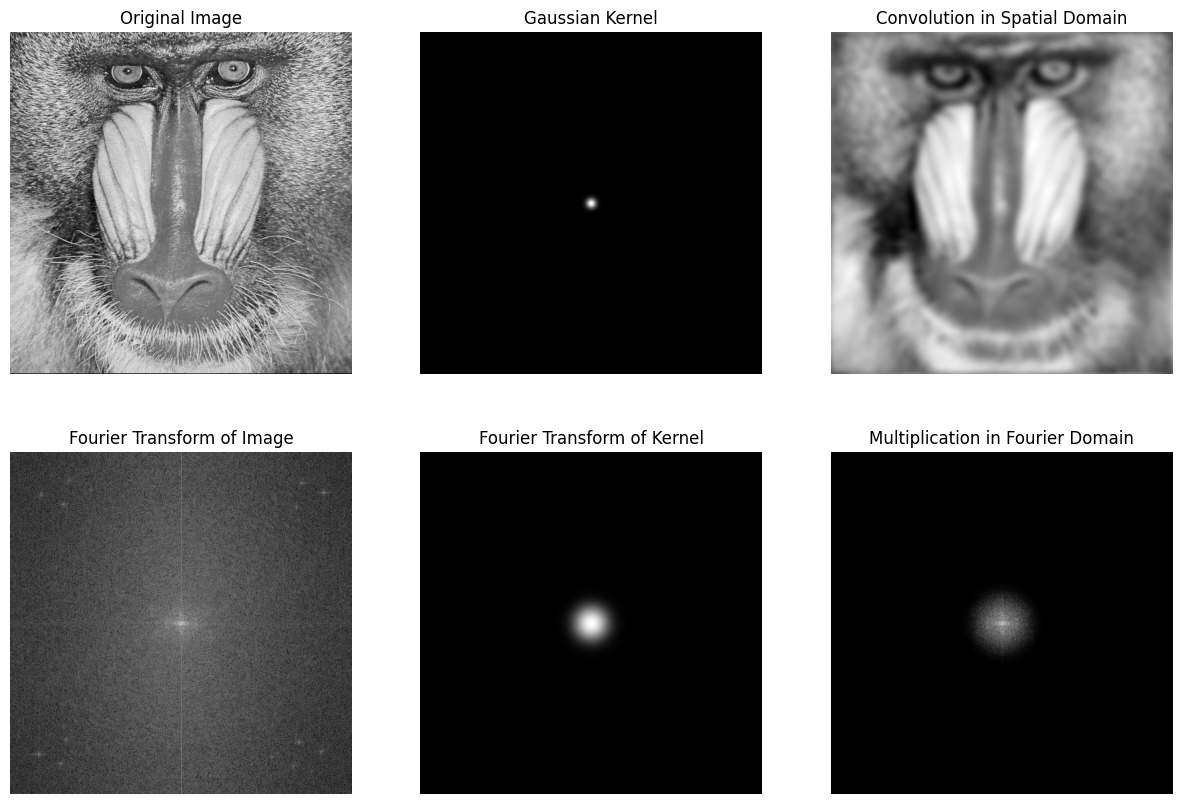

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(kernel, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Gaussian Kernel')

axes[0, 2].imshow(img_filtered.real, cmap='gray')
axes[0, 2].axis('off')
axes[0, 2].set_title('Convolution in Spatial Domain')

axes[1, 0].imshow(np.log(1 + np.abs(img_ft)), cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Fourier Transform of Image')

axes[1, 1].imshow(np.log(1 + np.abs(kernel_ft)), cmap='gray')
axes[1, 1].axis('off')
axes[1, 1].set_title('Fourier Transform of Kernel')

axes[1, 2].imshow(np.log(1 + np.abs(img_ft * kernel_ft)), cmap='gray')
axes[1, 2].axis('off')
axes[1, 2].set_title('Multiplication in Fourier Domain')

## 1.4 Image restoration problem: blur an image with PSF and add Gaussian noise 


In [12]:
# Blur the image by applying Gaussian filter to the image
img_blurry = img_filtered

In [13]:
# Add Gaussian noise on the blurry image
img_blurry_noisy = img_blurry + np.random.normal(0., 0.1, img.shape)

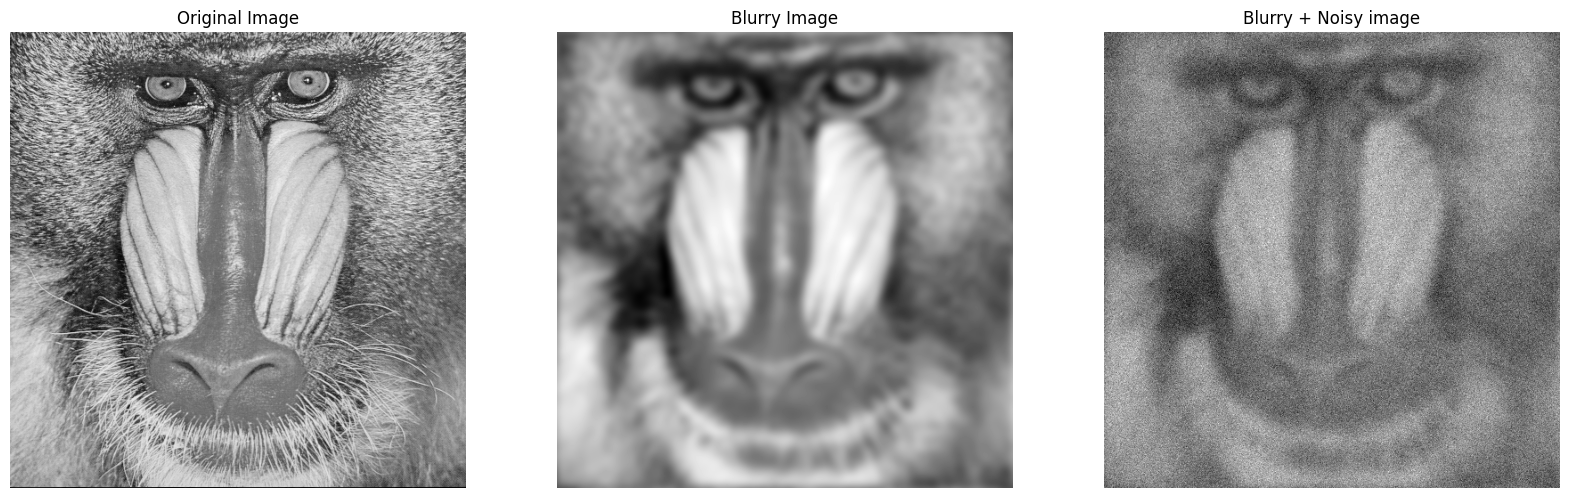

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(img_blurry, cmap='gray')
axes[1].axis('off')
axes[1].set_title(f'Blurry Image')

axes[2].imshow(img_blurry_noisy, cmap='gray')
axes[2].axis('off')
axes[2].set_title(f'Blurry + Noisy image')

## 2. Deconvolution solution for blurry & noisy 

In [16]:
# Inverse filter in frequency domain
h_ft = kernel_ft
h_inv_ft = np.where(h_ft, 1 / (h_ft + 1e-9), 0)

# Inverse filter in spatial domain
h_inv = np.fft.ifft2(np.fft.fftshift(h_inv_ft))
h_inv = np.fft.fftshift(h_inv)

# Fourier transform of the image
img_blurry_noisy_ft = np.fft.fft2(img_blurry_noisy)
img_blurry_noisy_ft = np.fft.fftshift(img_blurry_noisy_ft)

# Deconvolution in frequency domain 
img_restored_ft = h_inv_ft * img_blurry_noisy_ft
img_restored = np.fft.ifft2(np.fft.fftshift(img_restored_ft))
img_restored = np.fft.fftshift(img_restored).real 

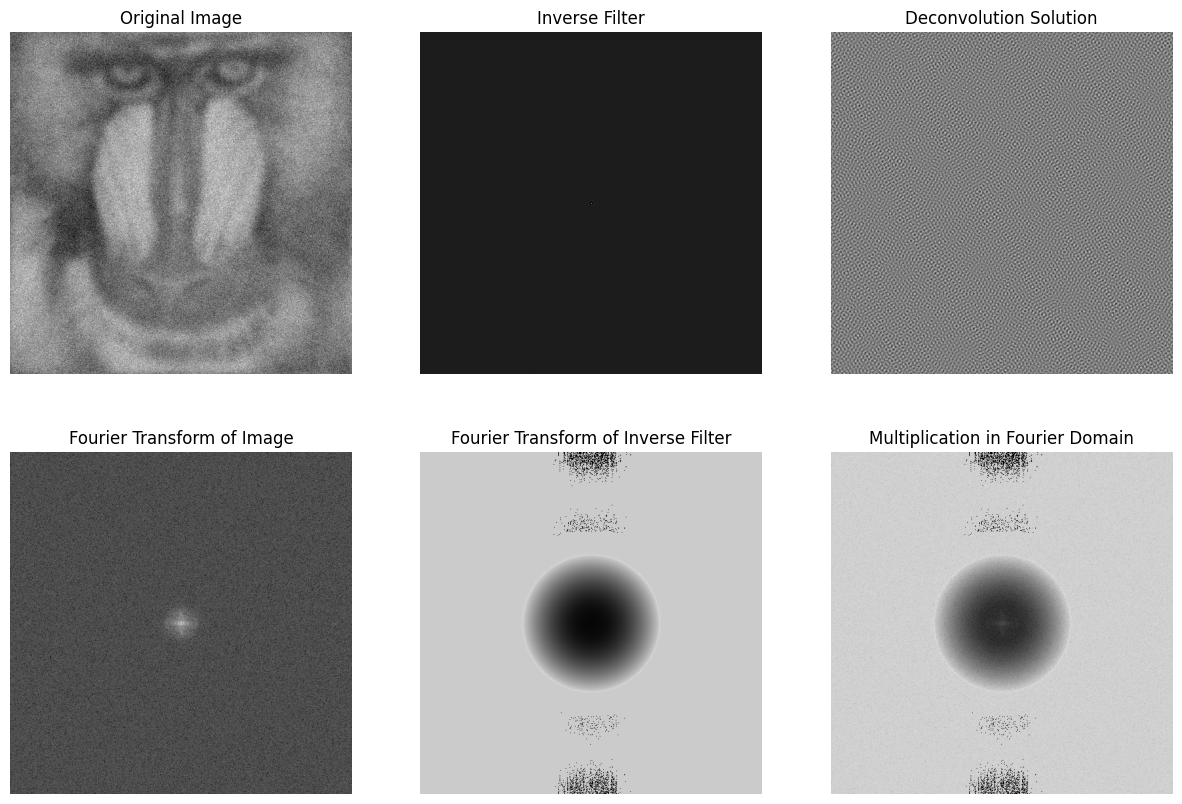

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0, 0].imshow(img_blurry_noisy, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(h_inv.real, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Inverse Filter')

axes[0, 2].imshow(img_restored.real, cmap='gray')
axes[0, 2].axis('off')
axes[0, 2].set_title('Deconvolution Solution')

axes[1, 0].imshow(np.log(1 + np.abs(img_blurry_noisy_ft)), cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Fourier Transform of Image')

axes[1, 1].imshow(np.log(1 + np.abs(h_inv_ft)), cmap='gray')
axes[1, 1].axis('off')
axes[1, 1].set_title('Fourier Transform of Inverse Filter')

axes[1, 2].imshow(np.log(1 + np.abs(img_restored_ft)), cmap='gray')
axes[1, 2].axis('off')
axes[1, 2].set_title('Multiplication in Fourier Domain')

# 3. 1-D matrix-vector representation


In [19]:
import numpy as np

x = np.arange(0, 7); N = len(x)
h = np.array([1, 3, 5, 4, 2]); L = len(h)
indices = np.array([-2, -1, 0, 1, 2])

h_orig = h
h = np.zeros_like(h_orig)
h[indices] = h_orig

print(f'Input x = {x}, N={len(x)}')
print(f'Kernel h = {h_orig}, L={len(h_orig)}')

Input x = [0 1 2 3 4 5 6], N=7
Kernel h = [1 3 5 4 2], L=5


<StemContainer object of 3 artists>

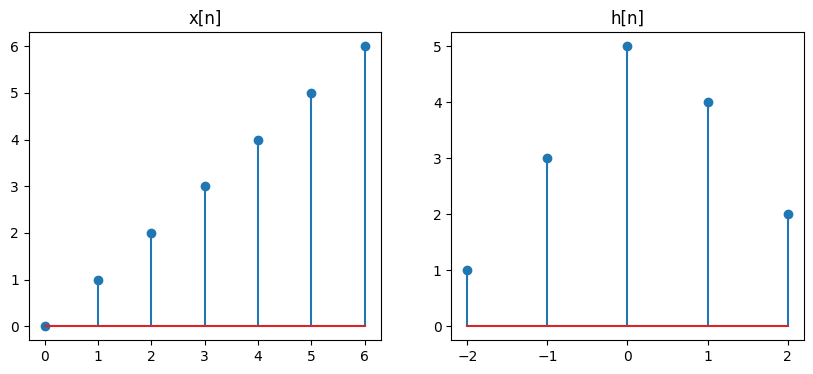

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title('x[n]')
plt.stem(range(N), x)

plt.subplot(122)
plt.title('h[n]')
plt.stem(indices, h_orig)

## 3.1. Define transformation matrix from 1D PSF
## 3.1.1. End conditions: Extended end condition 


System matrix A: N x (N+L-1) = 7 x 11


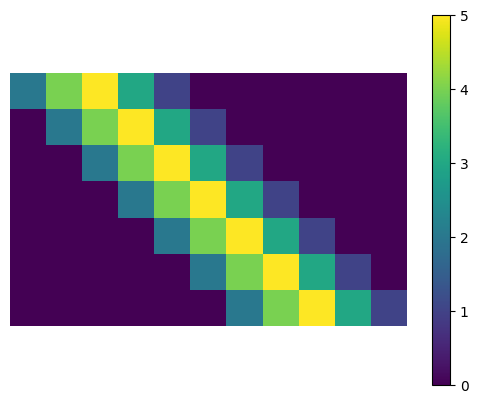

In [21]:
# Construct the system matrix with extended end condition 
def system_matrix_extended(h, N, L):
    A = np.zeros(shape=(N, N+L-1))    
    for i in range(N):
        for k, j in enumerate(indices):
            A[i, i+k] = h[-j]
    return A 

A = system_matrix_extended(h=h, N=N, L=L)    

print(f'System matrix A: N x (N+L-1) = {A.shape[0]} x {A.shape[1]}')

plt.imshow(A)
plt.axis('off')
plt.colorbar()
plt.show()

Input x' = [0 1 2 3 4 5 6], N=11
Kernel h = [5 4 2 1 3], L=5
Output y = [-3. 12. 27. 42. 57. 72. 87.], N=7


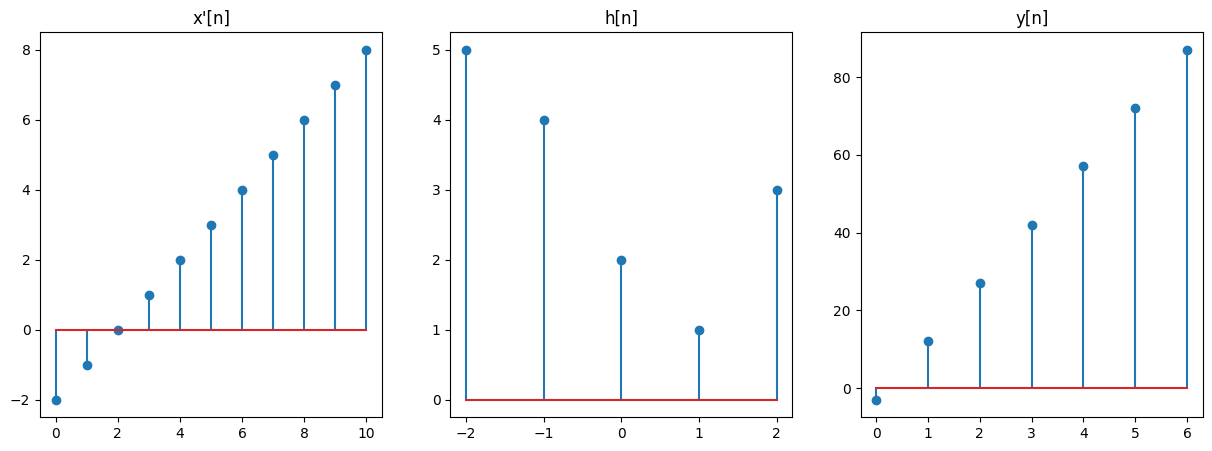

In [22]:
# Find the output with matrix-vector multiplication  
x_extended = np.array([-2, -1, *x, 7, 8])
y = A @ x_extended

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('x\'[n]')
plt.stem(range(N+L-1), x_extended)

plt.subplot(132)
plt.title('h[n]')
plt.stem(indices, h)

plt.subplot(133)
plt.title('y[n]')
plt.stem(range(len(y)), y)

print(f'Input x\' = {x}, N={len(x_extended)}')
print(f'Kernel h = {h}, L={len(h)}')
print(f'Output y = {y}, N={len(y)}')

## 3.1.2. End conditions: Zero end condition 


A: (N x N) = 7 x 7


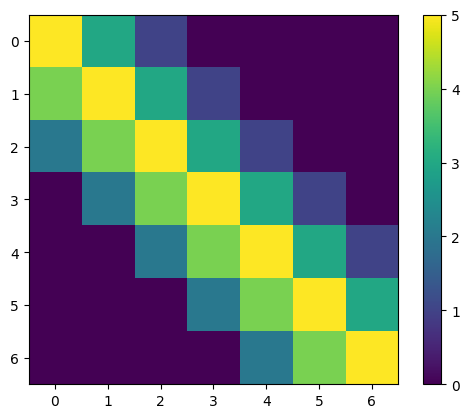

In [23]:
# Construct the system matrix with zero end condition 
def system_matrix_zero(h, N, L):
    A = np.zeros(shape=(N, N+L-1))    
    for i in range(N):
        for k, j in enumerate(indices):
            A[i, i+k] = h[-j]
            
    A = A[:, L//2:-(L//2)]
    return A 

A = system_matrix_zero(h=h, N=N, L=L)    

print(f'A: (N x N) = {A.shape[0]} x {A.shape[1]}')

plt.imshow(A)
plt.colorbar()
plt.show()

Input x = [0 1 2 3 4 5 6], N=7
Kernel h = [5 4 2 1 3], L=5
Output y = [ 5. 14. 27. 42. 57. 65. 58.], N=7


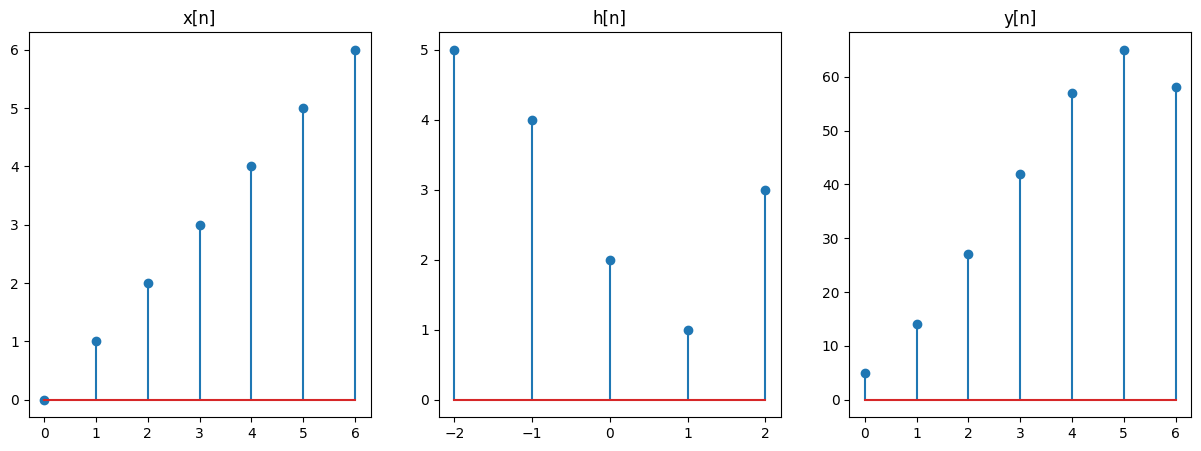

In [24]:
# Find the output with matrix-vector multiplication  
y = A @ x

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('x[n]')
plt.stem(range(N), x)

plt.subplot(132)
plt.title('h[n]')
plt.stem(indices, h)

plt.subplot(133)
plt.title('y[n]')
plt.stem(range(N), y)

print(f'Input x = {x}, N={len(x)}')
print(f'Kernel h = {h}, L={len(h)}')
print(f'Output y = {y}, N={len(y)}')

## 3.1.3. End conditions: Periodic end condition 


System matrix A: N x (N+L-1) = 7 x 7


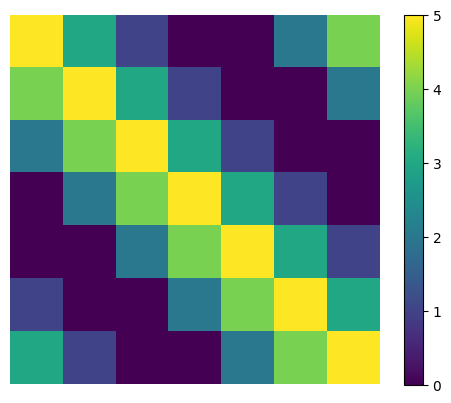

In [25]:
# Construct the system matrix with periodic end condition 
def system_matrix_periodic(h, N):     
    A = np.zeros(shape=(N, N))
    
    for i in range(N):
        for k in indices:
            A[i, (i + k) % N] = h[-k]
    return A 

A = system_matrix_periodic(h=h, N=N)

print(f'System matrix A: N x (N+L-1) = {A.shape[0]} x {A.shape[1]}')

plt.imshow(A)
plt.axis('off')
plt.colorbar()
plt.show()

Input x = [0 1 2 3 4 5 6], N=7
Kernel h = [5 4 2 1 3], L=5
Output y = [39. 26. 27. 42. 57. 65. 59.], N=7


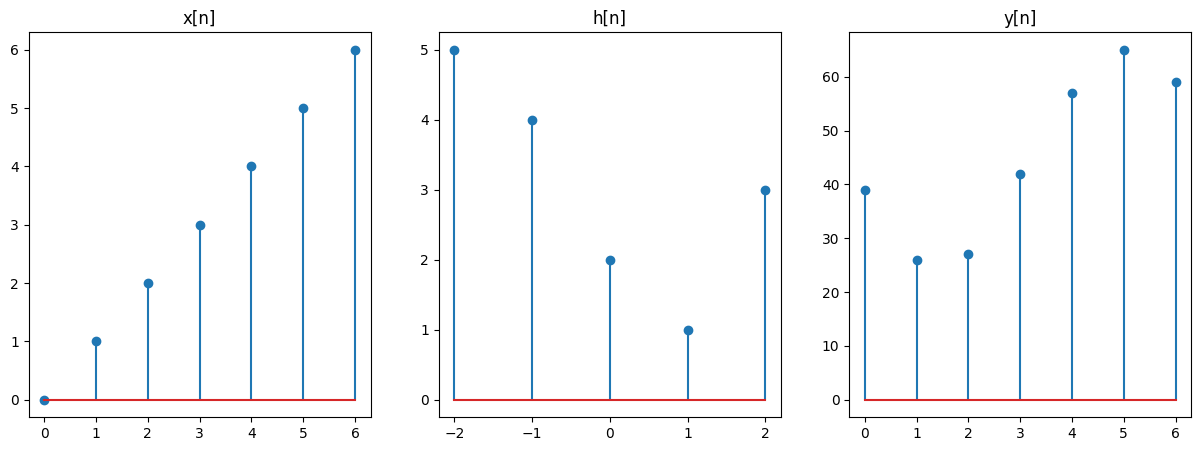

In [26]:
y = A @ x

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('x[n]')
plt.stem(range(N), x)

plt.subplot(132)
plt.title('h[n]')
plt.stem(indices, h)

plt.subplot(133)
plt.title('y[n]')
plt.stem(range(N), y)

print(f'Input x = {x}, N={len(x)}')
print(f'Kernel h = {h}, L={len(h)}')
print(f'Output y = {y}, N={len(y)}')

## 3.1.3. End conditions: Periodic end condition 

Input x = [1 2 3 4], N=4
Kernel h = [5 4 2 1 3], N=5
Periodized kernel h' = [8. 4. 2. 1.], N=4


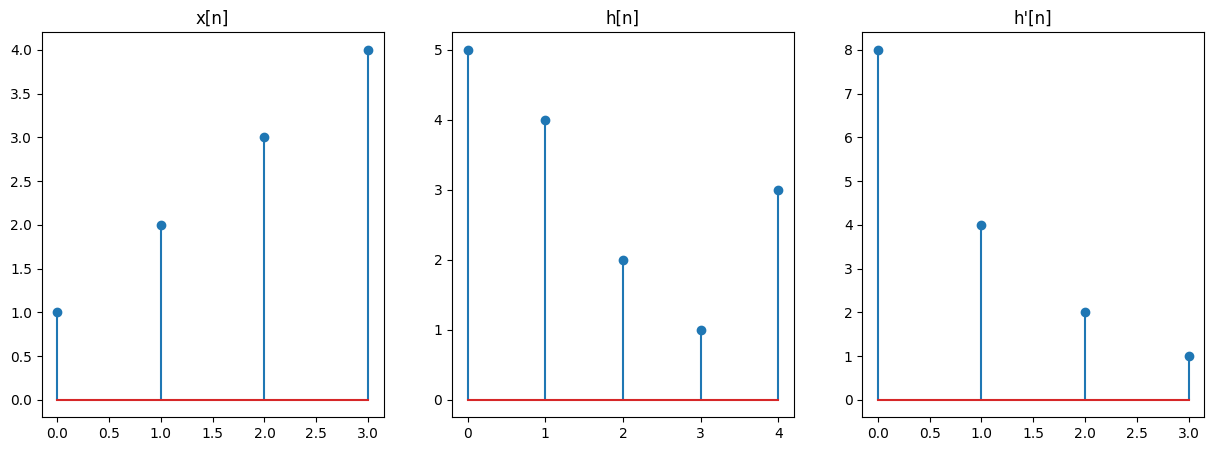

In [27]:
# Input signal 
x = np.array([1, 2, 3, 4])

N = len(x) 
M = len(h)

# Periodic superposition  
h_circ = np.zeros(N)
for i in range(M):
    h_circ[i % N] += h[i]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('x[n]')
plt.stem(range(N), x)

plt.subplot(132)
plt.title('h[n]')
plt.stem(range(M), h)

plt.subplot(133)
plt.title('h\'[n]')
plt.stem(range(N), h_circ)

print(f'Input x = {x}, N={len(x)}')
print(f'Kernel h = {h}, N={len(h)}')
print(f'Periodized kernel h\' = {h_circ}, N={len(h_circ)}')


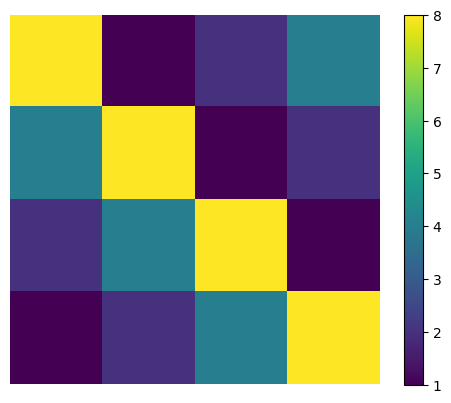

In [28]:
# Construct the system matrix with periodic end condition 
def system_matrix_periodic(h, N):     
    A = np.zeros((N, N))

    # Periodic superposition  
    M = len(h)
    h_circ = np.zeros(N)
    for i in range(M):
        h_circ[i % N] += h[i]
        
    # System matrix 
    for i in range(N):
        for j in range(N):
            A[i, j] = h_circ[(i - j) % N]
    
    return A 

A = system_matrix_periodic(h, N)
   
plt.imshow(A)
plt.colorbar()
plt.axis('off')
plt.show()

Input x = [1 2 3 4], N=4
Kernel h' = [8. 4. 2. 1.], L=4
Output y = [32. 31. 38. 49.], N=4


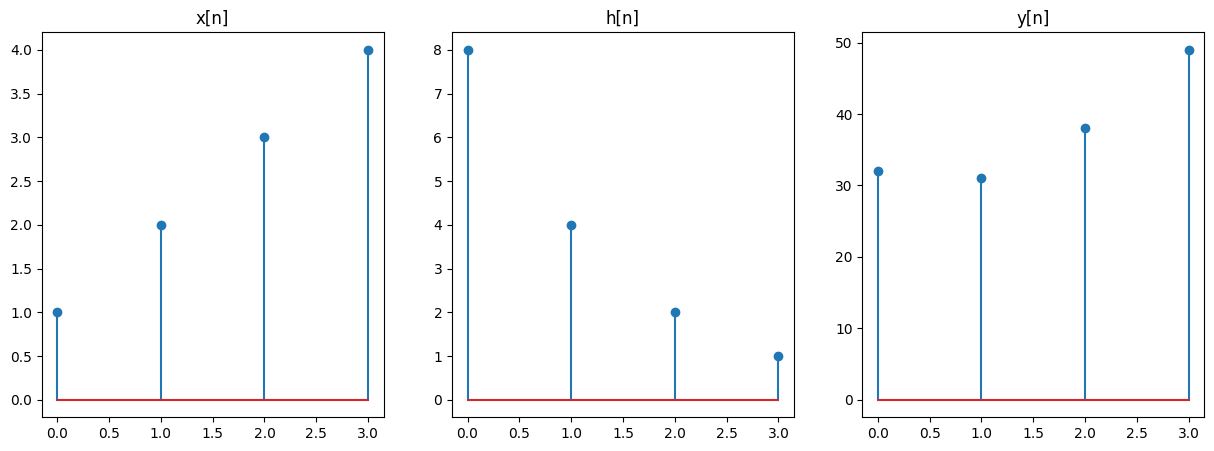

In [29]:
y = A @ x

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('x[n]')
plt.stem(range(N), x)

plt.subplot(132)
plt.title('h[n]')
plt.stem(range(N), h_circ)

plt.subplot(133)
plt.title('y[n]')
plt.stem(range(N), y)

print(f'Input x = {x}, N={len(x)}')
print(f'Kernel h\' = {h_circ}, L={len(h_circ)}')
print(f'Output y = {y}, N={len(y)}')

# 4. Circulant analysis in 1D 

In [30]:
# Construct the discrete Fourier transform (DFT) matrix
def dft_matrix(N):
    omega = np.exp(-2j * np.pi / N)
    W = np.array([[omega**(i * j) for j in range(N)] for i in range(N)])
   
    # inverse of W, which is complex conjugate transpose of W 
    W_inv = (1 / N) * np.conj(W.T)  
    return W, W_inv

# Input signal
x = np.array([1, 2, 3, 4])

# Compute DFT of x 
W, W_inv = dft_matrix(N=4)
X = W @ x

# Sanity check for the DFT matrix computation 
x_ft = np.fft.fft(x)

assert np.allclose(X.real, x_ft.real)
assert np.allclose(X.imag, x_ft.imag)
print("Computation of DFT matrix is correct!")

Computation of DFT matrix is correct!


In [31]:
# Compute circular convolution of x with h by using system matrix 
A = system_matrix_periodic(h, N=x.shape[0])
y_conv = A @ x

# Compute circular convolution by using DFT matrix 
H = W @ h_circ
Y = H * X
y_dft = W_inv @ Y 
y_dft = y_dft.real 

# Sanity check for the system matrix with periodic end condition
assert np.allclose(y_dft, y_conv)
print("Circular convolution with periodic system matrix is correct!")

Circular convolution with periodic system matrix is correct!


In [32]:
# Eigendecomposition of the system matrix A, which is a circulant matrix with periodic end condition 
eigenvalues, eigenvectors = np.linalg.eig(A)

np.set_printoptions(precision=2, suppress=True)

print("Eigenvalues of circulant matrix A: ", eigenvalues)
print("Discrete Fourier transform of h: ", H)

Eigenvalues of circulant matrix A:  [15.+0.j  6.+3.j  6.-3.j  5.+0.j]
Discrete Fourier transform of h:  [15.+0.j  6.-3.j  5.-0.j  6.+3.j]


## 4.1. Matrix-inverse solution using circulant analysis in 1D


In [33]:
A_ = W_inv @ np.diag(H) @ W

assert np.allclose(A, A_)
print("We could build the inverse of system matrix A by DFT method!")

A_inv = W_inv @ np.linalg.inv(np.diag(H)) @ W
x_hat = (A_inv @ y).real

assert np.allclose(x, x_hat)
print("We could restore x from the output signal y!")

We could build the inverse of system matrix A by DFT method!
We could restore x from the output signal y!


# 5. 2-D matrix vector representation
## 5.1. Lexicographic ordering: Vectorization


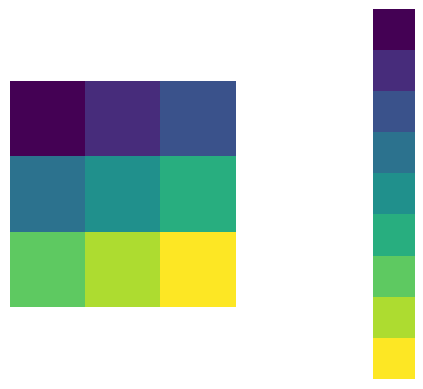

In [34]:
# Vectorization for an image 
import numpy as np

image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

def vec(image):
    N, M = image.shape
    y = np.zeros(shape=(M*N,))
    
    for m in range(M):
        for n in range(N):
            y[m+n*M] = image[n, m]
            
    return y 

y = vec(image)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.imshow(y.reshape(y.shape[0], 1))
plt.axis('off')
plt.show()

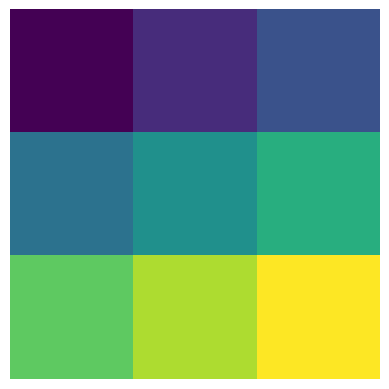

In [35]:
# Devectorization of an image vector 
def devec(y, M, N):
    I = np.zeros(shape=(N,M))
    
    for n in range(N):  # iterate over rows   
        for m in range(M): # iterate over columns   
            I[n,m] = y[m+n*M]
    return I 
       
I = devec(y, M=3, N=3) 

plt.imshow(I)
plt.axis('off')
plt.show()


## 5.2. Define transformation matrix from 2D PSF

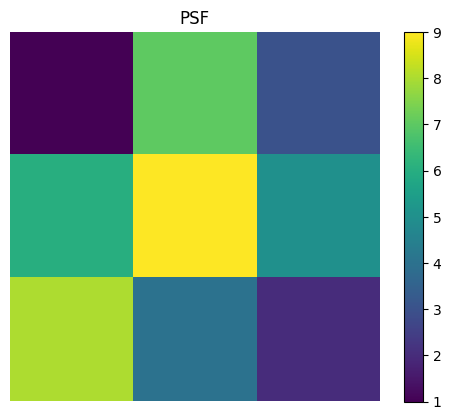

In [36]:
# Define 2D PSF 
psf = np.array([[1, 7, 3],
                [6, 9, 5],
                [8, 4, 2]])

plt.imshow(psf)
plt.colorbar()
plt.title('PSF')
plt.axis('off')
plt.show()

## 5.2.1. End conditions: Extended


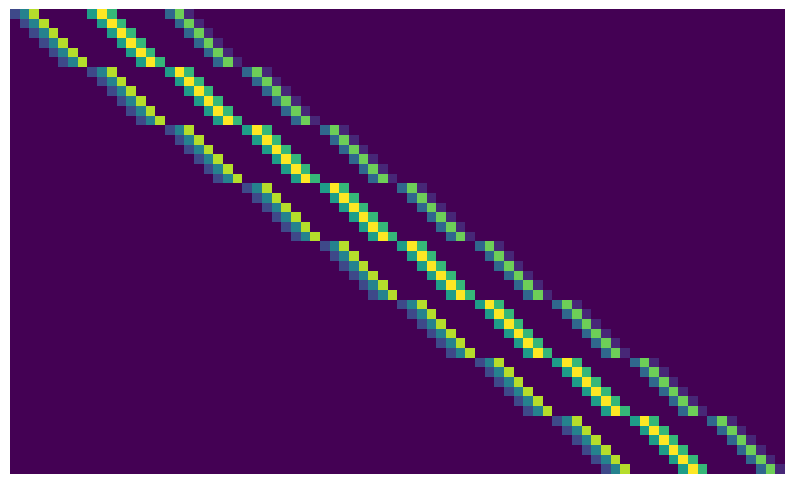

In [37]:
# Construct the system matrix for 2D PSF with extended end conditions 
def system_matrix_extended_2d(psf, M, N):    
    BM, BN = psf.shape
    
    A = np.zeros(shape=(M*N, (M+2)*(N+2)))
    psf_flipped = np.flip(np.flip(psf, axis=0), axis=1)
                  
    for n in range(N):
        for l in range(BN):
            psf_row = psf_flipped[l, :].reshape(1, BM)
            
            block = np.zeros(shape=(M, (M+2)))
            for m in range(M):
                block[m, m:m+BM] = psf_row 
             
            r = n*M
            c = (n+l)*(M+2)
            
            A[r:(r+M), c:(c+M+2)] = block
    return A 
  
M = 6  # column number i.e. row length 
N = 8  # row number i.e. column length           
A = system_matrix_extended_2d(psf, M=M, N=N)

plt.figure(figsize=(10,10))
plt.imshow(A)
plt.axis('off')
plt.show()

## 5.2.2. End conditions: Zero


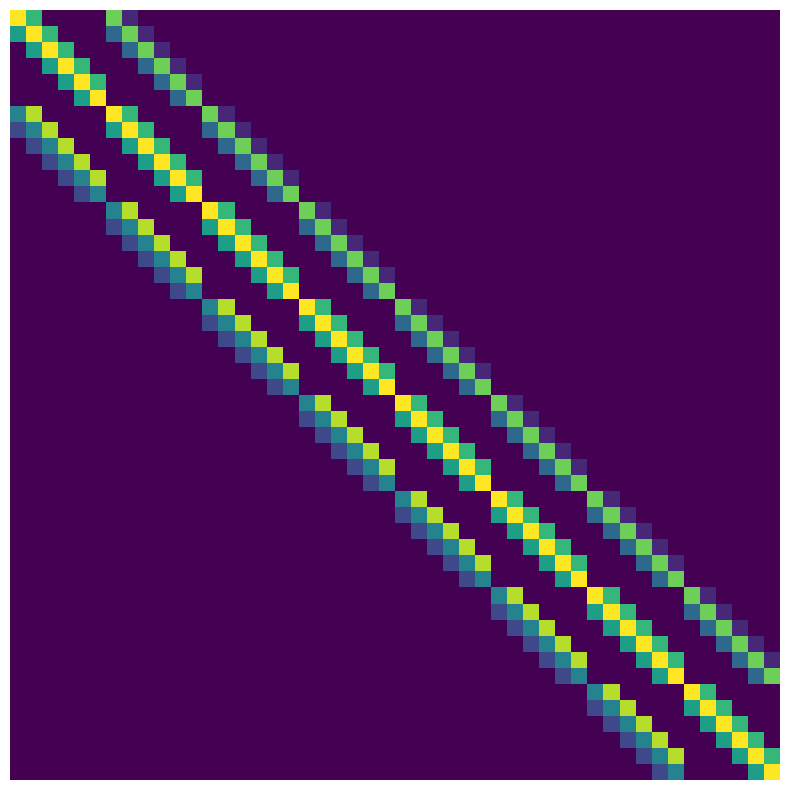

In [38]:
# Construct the system matrix for 2D PSF with zero end condition

def system_matrix_zero_2d(psf, M, N):    
    BM, BN = psf.shape
    
    A = np.zeros(shape=(M*N, M*(N+2)))
    psf_flipped = np.flip(np.flip(psf, axis=0), axis=1)
                  
    for n in range(N):
        for l in range(BN):
            psf_row = psf_flipped[l, :].reshape(1, BM)
            
            block = np.zeros(shape=(M, (M+2)))
            for m in range(M):
                block[m, m:m+BM] = psf_row 

            # cut the blocks for zero end condition 
            block = block[:, BM//2:-(BM//2)]
            
            r = n*M
            c = (n+l)*M
            
            A[r:(r+M), c:(c+M)] = block

    # cut the system matrix for zero end condition 
    A = A[:, M:-M]
    return A 

A = system_matrix_zero_2d(psf, M=6, N=8)  

plt.figure(figsize=(10,10))
plt.imshow(A)
plt.axis('off')
plt.show()

## 5.2.3. End conditions: Periodic

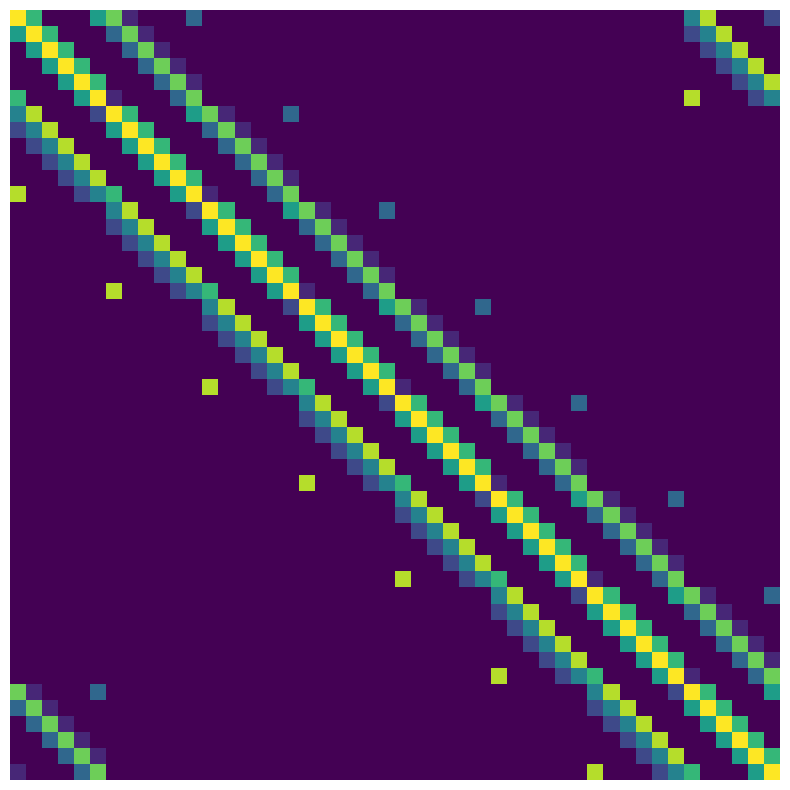

In [39]:
# Construct the system matrix for 2D PSF with periodic end condition
psf = np.array([[1, 7, 3],
                [6, 9, 5],
                [8, 4, 2]])

def system_matrix_periodic_2d(psf, M, N):
    
    # rearrange the kernel according to the indices 
    h = np.zeros_like(psf)
    for n, i in enumerate([-1, 0, 1]):
         for m, j in enumerate([-1, 0, 1]):
            h[i,j] = psf[n,m]
    
    BM, BN = h.shape 
             
    # A is a block circulant with circulant blocks 
    A = np.zeros(shape=(M*N, M*N))
    
    for n in range(N): 
        for l in [-1, 0, 1]:
            h_row = h[l, :].reshape(BM)
            
            # create circulant block 
            block = np.zeros(shape=(M, M))
            for m in range(M):  
                for k in [-1, 0, 1]:
                    # circular convolution by (m + k) % M 
                    # flipping by -k 
                    block[m, (m + k) % M] = h_row[-k]  
    
            # put the block to the corresponding block location 
            r = n*M
            
            # flipping the order of blocks by -l 
            c = ((n-l) % N) * M
            A[r:(r+M), c:(c+M)] = block
    
    return A 

A = system_matrix_periodic_2d(psf, M=6, N=8)

plt.figure(figsize=(10,10))
plt.imshow(A)
plt.axis('off')
plt.show()


## 5.3. Matrix inverse solution in 2D  


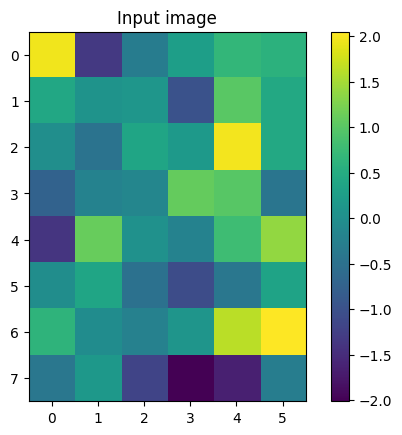

In [40]:
M, N = (6, 8)

x_img = np.random.normal(size=(N,M))

A = system_matrix_periodic_2d(psf, M=M, N=N)
x = vec(x_img)
y = A @ x

plt.title('Input image')
plt.imshow(x_img)
plt.colorbar()
plt.show()

We could restore input image!


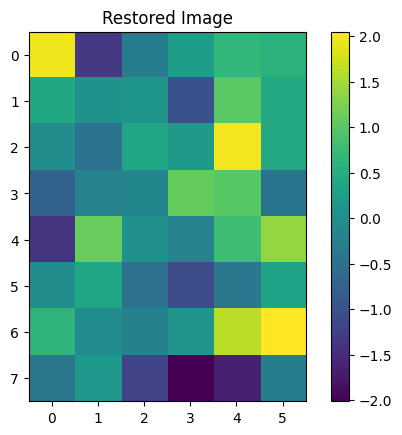

In [42]:
A_inv = np.linalg.inv(A)
x_hat = A_inv @ y 
x_img_hat = devec(x_hat, M=M, N=N)

assert np.allclose(x_hat, x)
print("We could restore input image!")

plt.imshow(x_img_hat)
plt.title('Restored Image')
plt.colorbar()
plt.show()